In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 상반기, 하반기 주유소 가격 데이터 조회
df1 = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv')
df2 = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv')

In [3]:
df11 = pd.concat([df1,df2])
df11.shape

(181714, 11)

In [4]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.6+ MB


In [5]:
first = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv', encoding = 'utf-8')
second = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv', encoding = 'utf-8')
first.shape, second.shape


((90590, 11), (91124, 11))

In [6]:
df = pd.concat([first,second], ignore_index= True)
df.shape

(181714, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [8]:
df.describe(include='object')

,번호,지역,상호,주소,상표,셀프여부
count,181714,181714,181714,181714,181714,181714
unique,512,25,507,512,8,2
top,A0001202,서울 강남구,신성주유소,서울 중랑구 망우로 311 (상봉동),SK에너지,일반
freq,365,14597,1095,365,71062,108492


In [9]:
#str accessor 부터 보기

In [10]:
df['지역'].str.split(" ").str[1] #뛰어쓰기 기준으로 1번 인덱스만 뽑아

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
181709    중랑구
181710    중랑구
181711    중랑구
181712    중랑구
181713    중랑구
Name: 지역, Length: 181714, dtype: object

In [14]:
df['구'] = df['지역'].str.slice(start=3,stop = 6)
df['구']

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
181709    중랑구
181710    중랑구
181711    중랑구
181712    중랑구
181713    중랑구
Name: 구, Length: 181714, dtype: object

In [15]:
df['기간']

0         20190101
1         20190102
2         20190103
3         20190104
4         20190105
            ...   
181709    20191227
181710    20191228
181711    20191229
181712    20191230
181713    20191231
Name: 기간, Length: 181714, dtype: int64

In [17]:
df['기간']= pd.to_datetime(df['기간'], format ='%Y%m%d')

In [18]:
from datetime import datetime

def parser(x):
    return datetime.strptime(x, '%Y%m%d')

first2 = pd.read_csv('data/2019년 상반기 주유소 판매가격.csv',
                    parse_dates=['기간'],
                    date_parser = parser)

first2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90590 entries, 0 to 90589
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      90590 non-null  object        
 1   지역      90590 non-null  object        
 2   상호      90590 non-null  object        
 3   주소      90590 non-null  object        
 4   기간      90590 non-null  datetime64[ns]
 5   상표      90590 non-null  object        
 6   셀프여부    90590 non-null  object        
 7   고급휘발유   90590 non-null  int64         
 8   휘발유     90590 non-null  int64         
 9   경유      90590 non-null  int64         
 10  실내등유    90590 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 7.6+ MB


In [19]:
first3 = pd.read_csv('data/2019년 하반기 주유소 판매가격.csv',
                    parse_dates=['기간'],
                    date_parser = lambda x: datetime.strptime(x, '%Y%m%d'))

first3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91124 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      91124 non-null  object        
 1   지역      91124 non-null  object        
 2   상호      91124 non-null  object        
 3   주소      91124 non-null  object        
 4   기간      91124 non-null  datetime64[ns]
 5   상표      91124 non-null  object        
 6   셀프여부    91124 non-null  object        
 7   고급휘발유   91124 non-null  int64         
 8   휘발유     91124 non-null  int64         
 9   경유      91124 non-null  int64         
 10  실내등유    91124 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 7.6+ MB


In [20]:
df.head()
df['년'] = df['기간'].dt.year #연도만 뽑아내
df['요일'] = df['기간'].dt.dayofweek #요일을 뽑아내 -> 월요일이 0
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day # 일

In [21]:
#요일을 월,화,수로 변환#요일을 월,화,수로 변환

def change_month_str(x):
    if x == 0:
        return '월'
    elif x == 1:
        return '화'
    elif x == 2:
        return '수'
    elif x == 3:
        return '목'
    elif x == 4:
        return '금'
    elif x == 5:
        return '토'
    elif x == 6:
        return '일'
    

In [22]:
df['요일'] = df['요일'].apply(change_month_str)
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,년,요일,월,일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,강남구,2019,화,1,1
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,강남구,2019,수,1,2
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,강남구,2019,목,1,3
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,강남구,2019,금,1,4
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,강남구,2019,토,1,5


In [23]:
df.sort_values(['휘발유','경유'], ascending = [False,True]).head(10)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,년,요일,월,일
177210,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,중구,2019,화,9,24
177211,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,중구,2019,수,9,25
177212,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,중구,2019,목,9,26
177213,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-27,SK에너지,일반,2699,2356,2196,0,중구,2019,금,9,27
177214,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-28,SK에너지,일반,2699,2356,2196,0,중구,2019,토,9,28
177215,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-29,SK에너지,일반,2699,2356,2196,0,중구,2019,일,9,29
177216,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,중구,2019,월,9,30
177217,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,중구,2019,화,10,1
177280,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-12-03,SK에너지,일반,2675,2332,2155,1594,중구,2019,화,12,3
177281,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-12-04,SK에너지,일반,2675,2332,2155,1594,중구,2019,수,12,4


In [26]:
df[df['휘발유']!=0].sort_values('휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,년,요일,월,일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,강서구,2019,목,2,7
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,은평구,2019,목,1,31
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,은평구,2019,수,1,30
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,은평구,2019,금,2,1
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,은평구,2019,토,1,26


In [30]:
상표_mean= df.loc[df['휘발유']!=0].groupby('상표')['휘발유'].mean()
상표_mean

상표
GS칼텍스     1564.313469
NH-OIL    1449.088889
S-OIL     1532.472987
SK에너지     1612.782625
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.670352
Name: 휘발유, dtype: float64

In [ ]:
#plt.figure(figsize=(7,7))
#
#sns.countplot(x = 'day', data= tips) #color = 'red') # x:  범주형 컬럼 주면 알아서 지정
#plt.show() # 컬러 통일 가능

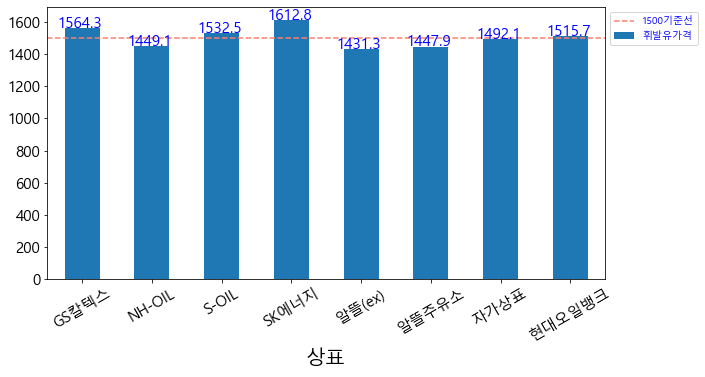

In [59]:
상표_mean.plot(kind ='bar', rot = 30, figsize= (10,5), label ='휘발유가격')


for i in range(상표_mean.size):
    plt.text(i-0.35,
            상표_mean[i]+1,
            np.round(상표_mean[i],1),
            fontsize = 15)
    
#기준선 긋기

plt.axhline(y = 1500, color = 'Salmon', linestyle='--', label = '1500기준선')

plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

In [39]:
for i in range(상표_mean.size):
    print(i)

0
1
2
3
4
5
6
7


In [40]:
상표_mean

상표
GS칼텍스     1564.313469
NH-OIL    1449.088889
S-OIL     1532.472987
SK에너지     1612.782625
알뜰(ex)    1431.347945
알뜰주유소     1447.875902
자가상표      1492.085540
현대오일뱅크    1515.670352
Name: 휘발유, dtype: float64

In [61]:
self_count =df['셀프여부'].value_counts(normalize = True)
self_count

일반    0.597048
셀프    0.402952
Name: 셀프여부, dtype: float64

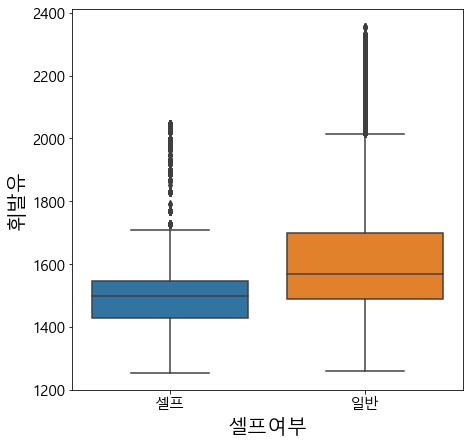

In [62]:
# 셀프여부별 휘발유 가격의 분포

plt.figure(figsize=(7,7))
sns.boxplot(x = '셀프여부', y = '휘발유', data = df[df['휘발유']!=0])

plt.show()

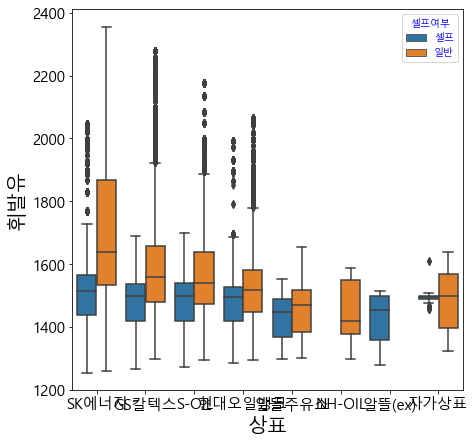

In [63]:
plt.figure(figsize=(7,7))
sns.boxplot(x= '상표', hue = '셀프여부', y = '휘발유', data = df[df['휘발유']!=0])

plt.show()

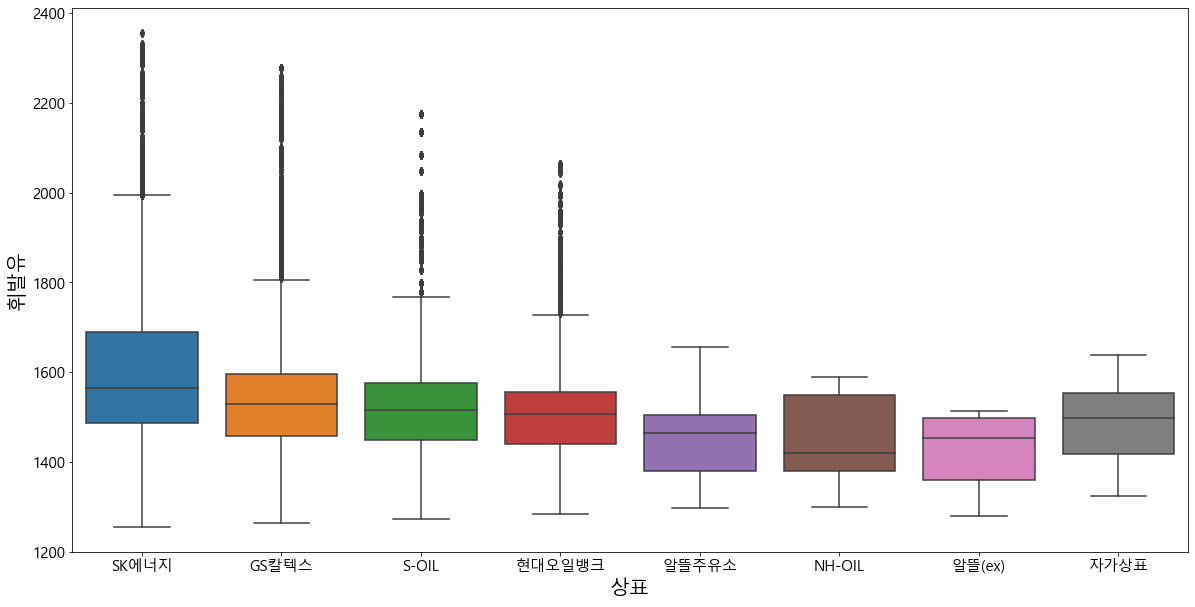

In [64]:
#상표별 후ㅣ발유 가격의 분포를 박스플롯으로 시각화

plt.figure(figsize = (20,10))

sns.boxplot(x ='상표',  y ='휘발유',data =df[df['휘발유']!=0])

plt.show()

In [65]:
#구별 휘발유 평균
구_휘발유_평균 = df.groupby('구')['휘발유'].mean().sort_values()
구_휘발유_평균

구
강북구    1453.517525
중랑구    1469.009092
금천구    1477.121992
은평구    1481.964026
강서구    1488.818088
광진구    1490.597054
도봉구    1494.171062
동대문    1506.833542
성북구    1507.948267
동작구    1512.470911
양천구    1512.890261
관악구    1518.128564
송파구    1518.957954
구로구    1525.410383
서대문    1528.943332
노원구    1531.221551
영등포    1568.279506
강동구    1576.685264
서초구    1577.131304
성동구    1583.659561
마포구    1689.755616
강남구    1713.093581
종로구    1838.554945
용산구    1882.049825
중구     1976.948052
Name: 휘발유, dtype: float64

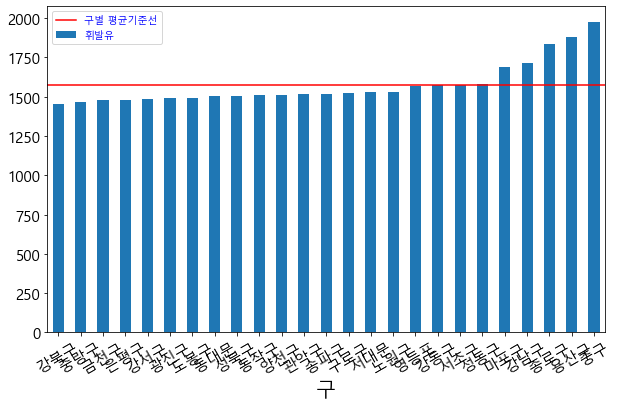

In [70]:
구_휘발유_평균.plot(kind ='bar', figsize= (10,6), rot = 30)


#평균가격을 기준선

plt.axhline(y = 구_휘발유_평균.mean(), color = 'r', label = '구별 평균기준선')

plt.legend()
plt.show()

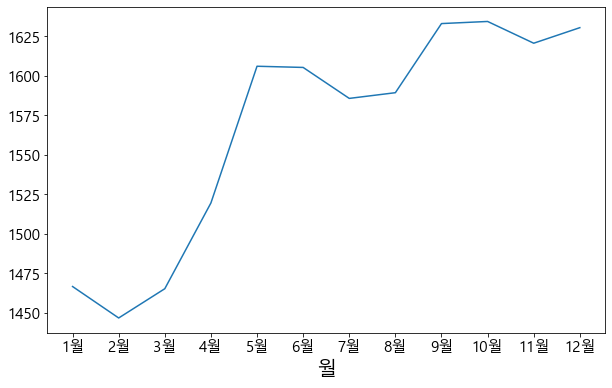

In [73]:
df.groupby('월')['휘발유'].mean().plot(kind = 'line', figsize= (10,6))


plt.xticks(range(1,13), labels = [f'{m}월' for m in range(1,13)])
plt.show()

In [76]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates())

비싼주유소 = df.groupby('상호')['휘발유'].mean().sort_values(ascending = False).head(5)
비싼주유소

상호
서남주유소          2207.252055
장충주유소          2139.323288
뉴서울(강남)        2130.060274
SC(주) 역전주유소    2125.778082
필동주유소          2098.095890
Name: 휘발유, dtype: float64

In [80]:
df.loc[df['상호'].isin(비싼주유소.index), ['상호','지역','주소']].drop_duplicates()

,상호,지역,주소
2896,뉴서울(강남),서울 강남구,서울 강남구 언주로 716 (논현동)
85869,SC(주) 역전주유소,서울 중구,서울 중구 퇴계로 15
86231,서남주유소,서울 중구,서울 중구 통일로 30
86955,장충주유소,서울 중구,서울 중구 장충단로 202 (장충동1가)
87317,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)
